Instalando bibliotecas

In [1]:
# Instalando matplotlib, proplot e numpy
!pip install -q matplotlib==3.4.3
!pip install -q proplot==0.9.7
!pip install -q numpy==1.24.3

# Instalando Xarray e suas dependências: https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
!pip install -q xarray dask netCDF4 bottleneck

# Instalando cartopy
!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy

Found existing installation: shapely 2.0.3
Uninstalling shapely-2.0.3:
  Successfully uninstalled shapely-2.0.3


Importando bibliotecas

In [3]:
import proplot as pplt                      # Biblioteca para gerar figuras
import cartopy.crs as ccrs                  # Biblioteca para trabalhar com projeções de mapas
import cartopy.io.shapereader as shpreader  # Biblioteca para ler arquivos shapefiles
import xarray as xr
import matplotlib.pyplot as plt

# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

Plotando figura
- dados ERA5 2D disponível em: https://apdrc.soest.hawaii.edu/data/data.php?discipline_index=3
- https://apdrc.soest.hawaii.edu/dods/public_data/Reanalysis_Data/ERA5/monthly_2d

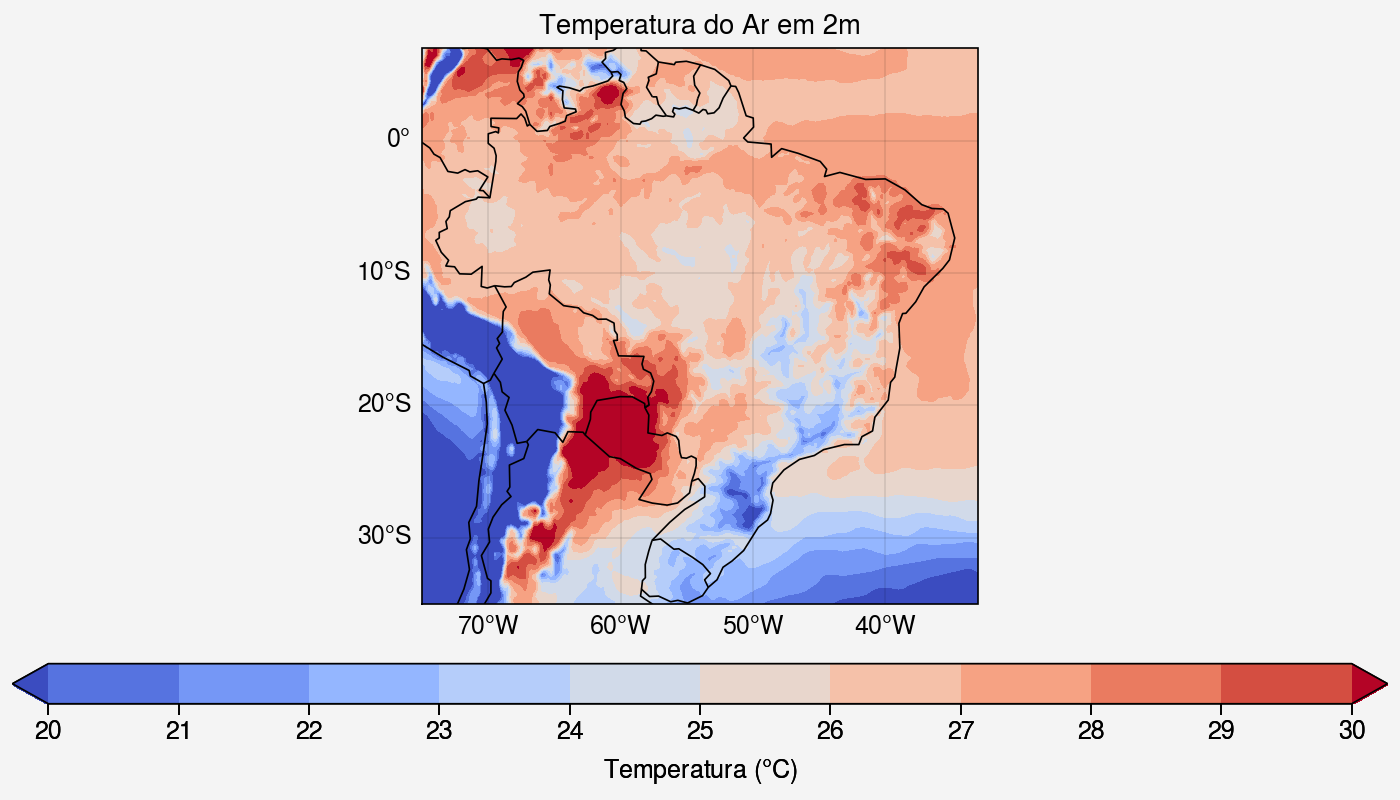

In [20]:
# limites do Brasil
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

# link dos dados
url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/Reanalysis_Data/'

# carrega os dados
er5_mensal = xr.open_dataset(url + 'ERA5/monthly_2d/Surface')

# transforma as longitudes de 0/360 para -180/+180
er5_mensal.coords['lon'] = ((er5_mensal.coords['lon'] + 180) % 360) - 180
er5_mensal = er5_mensal.sortby(er5_mensal.lon)

# seleciona os dados para o Brasil
er5_mensal_brasil = er5_mensal.sel(lon=slice(lonmin,lonmax), lat=slice(latmin,latmax)).sel(time=slice('1990-01-01','2024-12-01'))

# plota figura
fig, ax = pplt.subplots(figsize=(7, 4), tight=True, proj='pcarree')

ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=10, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          title='Temperatura do Ar em 2m')

map1 = ax.contourf(er5_mensal_brasil['lon'],
                   er5_mensal_brasil['lat'],
                   er5_mensal_brasil['t2m'].loc['2024-01-01']-273.15,
                   cmap='coolwarm',
                   levels=pplt.arange(20, 30, 1),
                   extend='both')

fig.colorbar(map1, loc='b', label='Temperatura ($\degree$C)')
pplt.show()